In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Specify data URI
URI = './data/ENB2012_data.xlsx'

# Use pandas excel reader
df=pd.read_excel(URI,engine="openpyxl")
df=df.sample(frac=1).reset_index(drop=True)

print(df.head())
df.shape         # (1296, 12)

     X1     X2     X3     X4   X5   X6    X7   X8     Y1     Y2  Unnamed: 10  \
0  0.82  612.5  318.5  147.0  7.0  2.0  0.10  1.0  23.53  27.31          NaN   
1   NaN    NaN    NaN    NaN  NaN  NaN   NaN  NaN    NaN    NaN          NaN   
2  0.76  661.5  416.5  122.5  7.0  5.0  0.25  2.0  36.45  36.81          NaN   
3   NaN    NaN    NaN    NaN  NaN  NaN   NaN  NaN    NaN    NaN          NaN   
4  0.64  784.0  343.0  220.5  3.5  5.0  0.10  3.0  15.36  19.29          NaN   

   Unnamed: 11  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  


(1296, 12)

In [11]:
## Fix NaN value
df.isna().sum()
df.dropna(how="all",inplace=True)   # drop NaN value

## Drop UNKNOWN columns
df.drop(['Unnamed: 10','Unnamed: 11'],axis=1,inplace=True)


In [12]:
print("Final data")
print(df.head())

print("Final Data Shape:",df.shape)         # (1296, 12)

print("Inspection of Null value of Final-data")
print(df.isna().sum())

Final data
     X1     X2     X3     X4   X5   X6    X7   X8     Y1     Y2
0  0.82  612.5  318.5  147.0  7.0  2.0  0.10  1.0  23.53  27.31
2  0.76  661.5  416.5  122.5  7.0  5.0  0.25  2.0  36.45  36.81
4  0.64  784.0  343.0  220.5  3.5  5.0  0.10  3.0  15.36  19.29
5  0.62  808.5  367.5  220.5  3.5  2.0  0.10  1.0  12.96  14.34
8  0.76  661.5  416.5  122.5  7.0  2.0  0.25  4.0  36.95  37.20
Final Data Shape: (768, 10)
Inspection of Null value of Final-data
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [13]:
## Split data to train-set,test-set
from sklearn.model_selection import train_test_split

# Split the data into train and test with 80 train / 20 test
train,test=train_test_split(df,test_size=0.2)
print("Train data shape:{} & Test data shape:{}".format(train.shape,test.shape))

Train data shape:(614, 10) & Test data shape:(154, 10)


In [14]:
# Removes both Target-columns(y1,y2) from train data
y1_train,y2_train=train.pop('Y1'),train.pop('Y2')  
y1_train,y2_train=np.array(y1_train),np.array(y2_train)

y1_test,y2_test=test.pop('Y1'),test.pop('Y2')  
y1_test,y2_test=np.array(y1_test),np.array(y2_test)

In [15]:
print("Train-target(y1) data shape:{} & Train-target(y2) data shape:{}".format(y1_train.shape,y2_train.shape))
print("Test-target(y1) data shape:{} & Test-target(y2) data shape:{}".format(y1_test.shape,y2_test.shape))

Train-target(y1) data shape:(614,) & Train-target(y2) data shape:(614,)
Test-target(y1) data shape:(154,) & Test-target(y2) data shape:(154,)


In [16]:
train_stats=train.describe().transpose()
print("Training data Stats:\n ",train_stats)
print("Training data Mean:{} & Training data Mean:{}".format(train_stats["mean"],train_stats["std"]))


## Normalize data-set
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']

norm_train_X=norm(train)
norm_test_X=norm(test)

Training data Stats:
      count        mean        std     min     25%     50%     75%     max
X1  614.0    0.762215   0.104546    0.62    0.66    0.74    0.82    0.98
X2  614.0  673.191368  87.221482  514.50  612.50  686.00  759.50  808.50
X3  614.0  318.300489  43.730298  245.00  294.00  318.50  343.00  416.50
X4  614.0  177.445440  45.009015  110.25  147.00  220.50  220.50  220.50
X5  614.0    5.221498   1.751195    3.50    3.50    3.50    7.00    7.00
X6  614.0    3.545603   1.120929    2.00    3.00    4.00    5.00    5.00
X7  614.0    0.237134   0.132816    0.00    0.10    0.25    0.40    0.40
X8  614.0    2.780130   1.552411    0.00    1.00    3.00    4.00    5.00
Training data Mean:X1      0.762215
X2    673.191368
X3    318.300489
X4    177.445440
X5      5.221498
X6      3.545603
X7      0.237134
X8      2.780130
Name: mean, dtype: float64 & Training data Mean:X1     0.104546
X2    87.221482
X3    43.730298
X4    45.009015
X5     1.751195
X6     1.120929
X7     0.132816
X8   

In [17]:
# Define model layers.

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

def custom_model():
    input_layer=Input(name='input_layer',shape=(len(train.columns),))
    first_dense=Dense(units='512',activation='relu',name='first_dense_layer')(input_layer)
    second_dense=Dense(units='256',activation='relu',name='second_dense_layer')(first_dense)
    third_dense=Dense(units='128',activation='relu',name='third_dense_layer')(second_dense)
    fourth_dense=Dense(units='64',activation='relu',name='fourth_dense_layer')(third_dense)

    y1_output=Dense(units='1',name='y1_output_layer')(third_dense)
    y2_output=Dense(units='1',name='y2_output_layer')(fourth_dense)

    model=Model(inputs=input_layer,outputs=[y1_output,y2_output])
    
    return model

model=custom_model()
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 8)]          0                                            
__________________________________________________________________________________________________
first_dense_layer (Dense)       (None, 512)          4608        input_layer[0][0]                
__________________________________________________________________________________________________
second_dense_layer (Dense)      (None, 256)          131328      first_dense_layer[0][0]          
__________________________________________________________________________________________________
third_dense_layer (Dense)       (None, 128)          32896       second_dense_layer[0][0]         
_______________________________________________________________________________________

In [24]:
## plot model
from tensorflow.keras.utils import plot_model

plot_model(model,to_file="custom_model_plot.png",show_shapes=True,show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [25]:
## Compile Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import RootMeanSquaredError

model.compile(optimizer=SGD(lr=0.001),
                loss={'y1_output_layer':'mse','y2_output_layer':'mse'}, # specify loss for both outputs
                metrics={'y1_output_layer':RootMeanSquaredError(),'y2_output_layer':RootMeanSquaredError()}) # specify metrics for both outputs

In [26]:
Y_train=y1_train,y2_train
Y_test=y1_test,y2_test

## Train Model
history=model.fit(norm_train_X,Y_train,epochs=500,batch_size=10,validation_data=(norm_test_X,Y_test))

Epoch 1/500
62/62 [==============================] - 2s 32ms/step - loss: 327.1373 - y1_output_layer_loss: 129.9226 - y2_output_layer_loss: 197.2145 - y1_output_layer_root_mean_squared_error: 11.3984 - y2_output_layer_root_mean_squared_error: 14.0433 - val_loss: 34.7085 - val_y1_output_layer_loss: 12.6886 - val_y2_output_layer_loss: 22.0199 - val_y1_output_layer_root_mean_squared_error: 3.5621 - val_y2_output_layer_root_mean_squared_error: 4.6925
Epoch 2/500
62/62 [==============================] - 1s 21ms/step - loss: 95.6503 - y1_output_layer_loss: 30.4156 - y2_output_layer_loss: 65.2347 - y1_output_layer_root_mean_squared_error: 5.5150 - y2_output_layer_root_mean_squared_error: 8.0768 - val_loss: 336.4328 - val_y1_output_layer_loss: 95.8291 - val_y2_output_layer_loss: 240.6038 - val_y1_output_layer_root_mean_squared_error: 9.7892 - val_y2_output_layer_root_mean_squared_error: 15.5114
Epoch 3/500
62/62 [==============================] - 1s 22ms/step - loss: 76.2094 - y1_output_layer_

In [65]:
# Test the model and print loss and mse for both outputs
loss,Y1_loss,Y2_loss,Y1_rmse,Y2_rmse=model.evaluate(x=norm_test_X,y=Y_test)
print("Loss={}, Y1_loss={}, Y1_mse={}, Y2_loss={}, Y2_mse={}".format(loss,Y1_loss,Y1_rmse,Y2_loss,Y2_rmse))

5/5 [==============================] - 0s 12ms/step - loss: 0.3726 - y1_output_layer_loss: 0.1540 - y2_output_layer_loss: 0.2186 - y1_output_layer_root_mean_squared_error: 0.3924 - y2_output_layer_root_mean_squared_error: 0.4676
Loss=0.3726175129413605, Y1_loss=0.15398617088794708, Y1_mse=0.3924107253551483, Y2_loss=0.2186313420534134, Y2_mse=0.46758031845092773


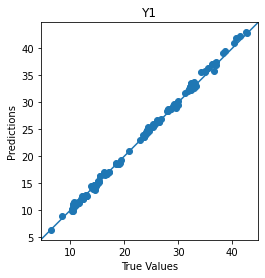

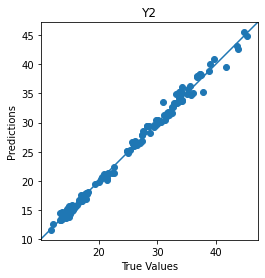

In [27]:
## Plot Model
def plot_diff(y_true,y_pred,title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()

Y_pred = model.predict(norm_test_X)
plot_diff(Y_test[0],Y_pred[0],title='Y1')
plot_diff(Y_test[1],Y_pred[1],title='Y2')

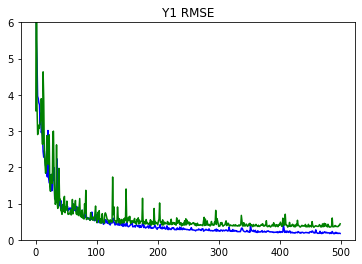

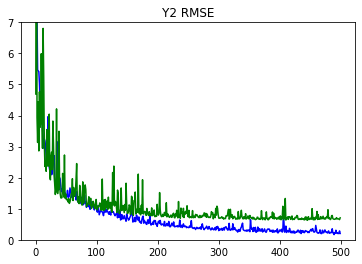

In [28]:
## Plot metrics
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

plot_metrics(metric_name='y1_output_layer_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_layer_root_mean_squared_error', title='Y2 RMSE', ylim=7)
